<a href="https://colab.research.google.com/github/nipunikajain/DeepLearning1/blob/main/mlp_pytorch_softmax_crossentr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MLP With Different Loss Functions


## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

In [2]:
import time
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

## Settings and Dataset

In [3]:
## Settings

RANDOM_SEED = 1
BATCH_SIZE = 100
EPOCHS = 100
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## MNIST DATASET

train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform = transforms.ToTensor(),
                               download = True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())

train_loader = DataLoader(dataset= train_dataset,
                          batch_size = BATCH_SIZE,
                          shuffle=False)

test_loader = DataLoader(dataset= test_dataset,
                          batch_size = BATCH_SIZE,
                          shuffle=False)

# Checking the dataset

for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 278211920.88it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 35419793.52it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 132240074.13it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3005289.28it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([100, 1, 28, 28])
Image label dimensions: torch.Size([100])


## Model

In [8]:
class MLP(torch.nn.Module):

    def __init__(self, num_features, num_hidden, num_classes):
        super().__init__()
        
        self.num_classes = num_classes
        
        ### 1st hidden layer
        self.linear_1 = torch.nn.Linear(num_features, num_hidden)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()

        ### Output layer
        self.linear_out = torch.nn.Linear(num_hidden, num_classes)
        self.linear_out.weight.detach().normal_(0.0, 0.1)
        self.linear_out.bias.detach().zero_()
        
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        #probas = torch.softmax(logits, dim=1)
        return logits#, probas

    
#################################
### Model Initialization
#################################
    
torch.manual_seed(RANDOM_SEED)
model = MLP(num_features=28*28,
            num_hidden=100,
            num_classes=10)

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#################################
### Training
#################################

def compute_loss(net, data_loader):
    curr_loss = 0.
    with torch.no_grad():
        for cnt, (features, targets) in enumerate(data_loader):
            features = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            logits = net(features)
            loss = F.cross_entropy(logits, targets)
            curr_loss += loss
        return float(curr_loss)/cnt



start_time = time.time()
minibatch_cost = []
epoch_cost = []
for epoch in range(EPOCHS):
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits = model(features)
        
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
       
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        minibatch_cost.append(cost.item())
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, EPOCHS, batch_idx, 
                     len(train_loader), cost.item()))
        
    cost = compute_loss(model, train_loader)
    epoch_cost.append(cost)
    print('Epoch: %03d/%03d Train Cost: %.4f' % (
            epoch+1, EPOCHS, cost))
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/100 | Batch 000/600 | Cost: 2.4327
Epoch: 001/100 | Batch 050/600 | Cost: 1.8518
Epoch: 001/100 | Batch 100/600 | Cost: 1.4085
Epoch: 001/100 | Batch 150/600 | Cost: 1.0734
Epoch: 001/100 | Batch 200/600 | Cost: 1.1102
Epoch: 001/100 | Batch 250/600 | Cost: 0.7339
Epoch: 001/100 | Batch 300/600 | Cost: 0.8592
Epoch: 001/100 | Batch 350/600 | Cost: 0.5976
Epoch: 001/100 | Batch 400/600 | Cost: 0.5606
Epoch: 001/100 | Batch 450/600 | Cost: 0.7429
Epoch: 001/100 | Batch 500/600 | Cost: 0.5616
Epoch: 001/100 | Batch 550/600 | Cost: 0.4497
Epoch: 001/100 Train Cost: 0.4987
Time elapsed: 0.27 min
Epoch: 002/100 | Batch 000/600 | Cost: 0.4618
Epoch: 002/100 | Batch 050/600 | Cost: 0.4555
Epoch: 002/100 | Batch 100/600 | Cost: 0.4530
Epoch: 002/100 | Batch 150/600 | Cost: 0.3313
Epoch: 002/100 | Batch 200/600 | Cost: 0.5670
Epoch: 002/100 | Batch 250/600 | Cost: 0.3535
Epoch: 002/100 | Batch 300/600 | Cost: 0.5047
Epoch: 002/100 | Batch 350/600 | Cost: 0.3256
Epoch: 002/100 | Batch 

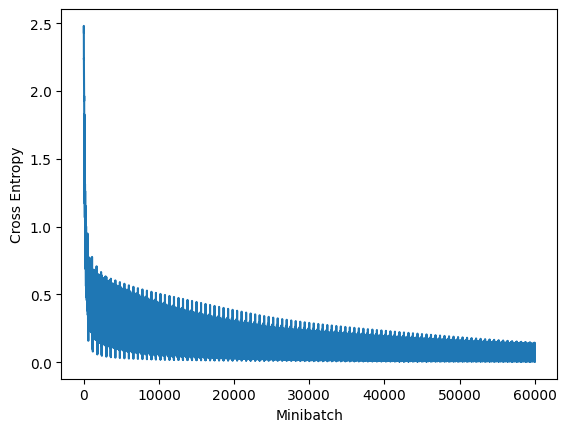

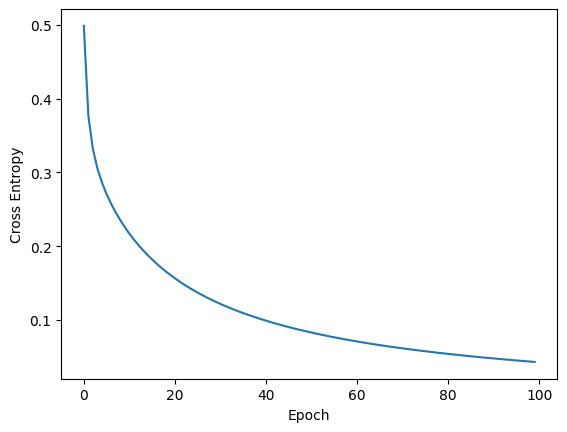

In [9]:
plt.plot(range(len(minibatch_cost)), minibatch_cost)
plt.ylabel('Cross Entropy')
plt.xlabel('Minibatch')
plt.show()

plt.plot(range(len(epoch_cost)), epoch_cost)
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()

In [10]:
def compute_accuracy(net, data_loader):
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for features, targets in data_loader:
            features = features.view(-1, 28*28).to(DEVICE)
            targets = targets.to(DEVICE)
            logits = net.forward(features)
            predicted_labels = torch.argmax(logits, 1)
            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        return correct_pred.float()/num_examples * 100
    
print('Training Accuracy: %.2f' % compute_accuracy(model, train_loader))
print('Test Accuracy: %.2f' % compute_accuracy(model, test_loader))

Training Accuracy: 98.99
Test Accuracy: 97.63
